In [2]:
import matplotlib.pyplot as plt
import pickle
import matplotlib
font = {'size'   : 22, }
matplotlib.rc('font', **font)

def plot_losses(filepath, title='Training error'):
    modelname = filepath.split('.')[0]
    train_loss, val_loss = pickle.load(open(filepath, 'rb'))
    
    plt.figure(figsize=[20,10])
    plt.xlabel('Epoch')
    plt.ylabel('CE Loss')
    plt.title(title)
    plt.plot(train_loss, linewidth=5)
    plt.plot(val_loss, linewidth=5)
    plt.legend(['train', 'val'])
    plt.savefig(modelname + '.png')
    plt.show()
    
    print('min val loss:', min(val_loss))

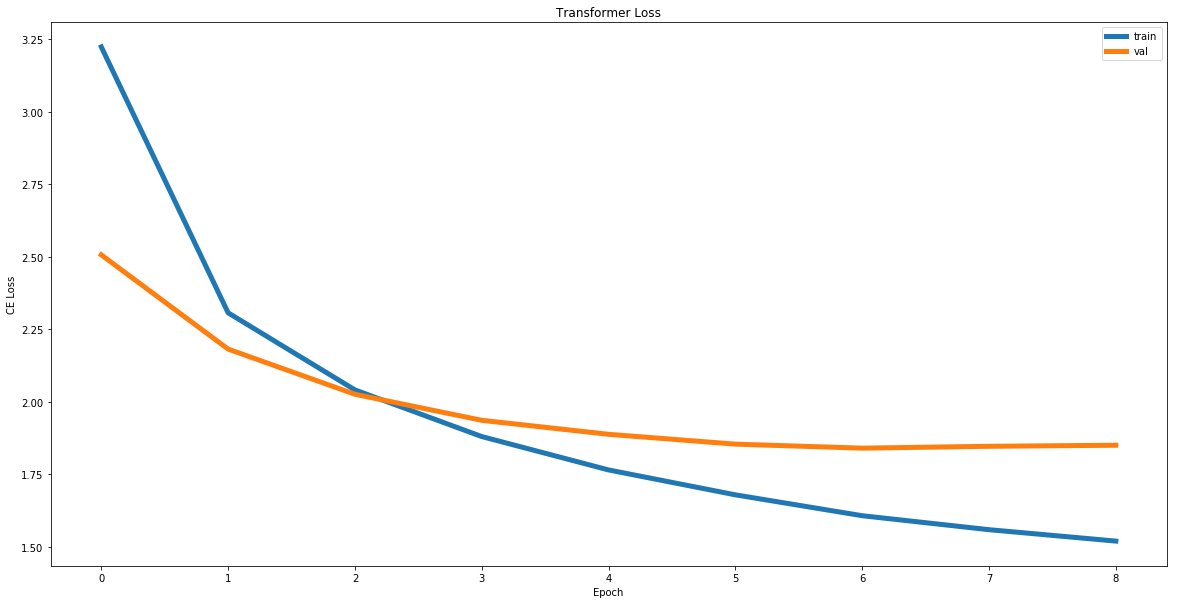

min val loss: 1.8407452619552613


In [3]:
plot_losses('paraphrase-losses.pickle', 'Transformer Loss')

# time per epoch: about 500 seconds

In [4]:
PAD_token = 0
SOS_token = 1
EOS_token = 2
UNK_token = 3

PAD, SOS, EOS, UNK = "<PAD>", "<SOS>", "<EOS>", "<UNK>"

class Vocab:
    def __init__(self):
        self.word2index = {}
        self.word2count = {}
        self.index2word = {}
        self.n_words = 0
        
        self.add_word(PAD)
        self.add_word(SOS)
        self.add_word(EOS)
        self.add_word(UNK)
        

    def add_sentence(self, sentence):
        for word in sentence:
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [6]:
train_data, val_data, vocab = pickle.load(open('paraphrases_dataset.pickle', 'rb'))

NameError: name 'torch' is not defined

In [13]:
src_train, trg_train = zip(*train_data)

In [22]:
len(val_data)

100

In [ ]:
import matplotlib.pyplot as plt
src_lengths = [len(x) for x,y in (train_data+val_data)]
tar_lengths = [len(y) for x,y in (train_data+val_data)]

plt.hist(src_lengths, edgecolor='black')
plt.xlabel('SRC Sentence Length')
plt.savefig(google_path + 'src_lengths.png')
plt.show()

plt.hist(tar_lengths, edgecolor='black', color='red')
plt.xlabel('TAR Sentence Length')
plt.savefig(google_path + 'tar_lengths.png')
plt.show()